In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from utils.helper import load_and_summarize, split_data, evaluate_classifier, scale_dataframe

In [2]:
df_liver = load_and_summarize('CSV Files/liver_patient.csv')

--- Loading liver_patient.csv ---
First 5 rows:
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  


In [3]:
df_liver.drop(columns=['Age', 'Gender'], inplace=True)
df_liver.rename(columns = {'Dataset' : 'liver_disease' }, inplace = True)
df_liver.dropna(inplace=True)

In [4]:
print(df_liver.isnull().sum())

Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
liver_disease                 0
dtype: int64


In [5]:
df_liver['liver_disease'] = df_liver['liver_disease'].map({1: 1, 2: 0})

In [6]:
X_liver = df_liver.drop(columns=['liver_disease'])
y_liver = df_liver['liver_disease']

In [7]:
X_scaled_liver = scale_dataframe(X_liver)

In [8]:
df_scaled_liver = X_scaled_liver.copy()
df_scaled_liver['liver_disease'] = y_liver.reset_index(drop=True)

In [9]:
X_train_liv, X_test_liv, y_train_liv, y_test_liv = split_data(df_scaled_liver, target_column='liver_disease')

In [10]:
log_reg_liver = LogisticRegression(random_state=42,class_weight='balanced')
log_reg_liver.fit(X_train_liv, y_train_liv)

LogisticRegression(class_weight='balanced', random_state=42)

In [11]:
y_pred_liv = log_reg_liver.predict(X_test_liv)
evaluate_classifier(y_test_liv, y_pred_liv, model_name="Logistic Regression (Liver Data)")

Accuracy for Logistic Regression (Liver Data): 0.6379


In [12]:
precision = precision_score(y_test_liv, y_pred_liv)
recall = recall_score(y_test_liv, y_pred_liv)
f1 = f1_score(y_test_liv, y_pred_liv)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.8974
Recall: 0.4795
F1 Score: 0.6250


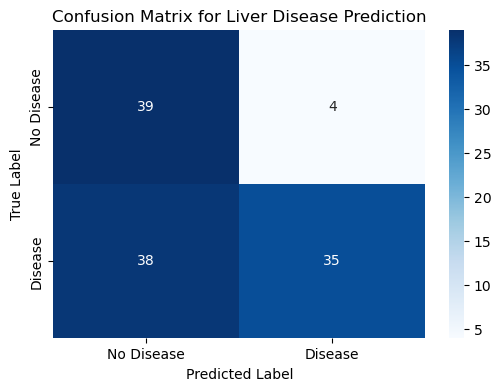

In [13]:
cm = confusion_matrix(y_test_liv, y_pred_liv)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix for Liver Disease Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**High Precision**: The model is highly reliable when it predicts the "Disease" class. With only 4 False Positives against 35 True Positives, its positive predictions are correct approximately 90% of the time.

**Low Recall**: The model struggles to identify all actual positive cases. It missed 38 patients who truly had the disease (False Negatives), resulting in a recall of about 48%.

##### The model demonstrates a clear precision-recall trade-off. After balancing the class weights, it has become a conservative classifier, prioritizing the accuracy of its positive predictions at the significant cost of missing a large number of actual positive cases.

In [14]:
y_pred_proba = log_reg_liver.predict_proba(X_test_liv)[:, 1]
fpr, tpr, _ = roc_curve(y_test_liv, y_pred_proba)
roc_auc = auc(fpr, tpr)

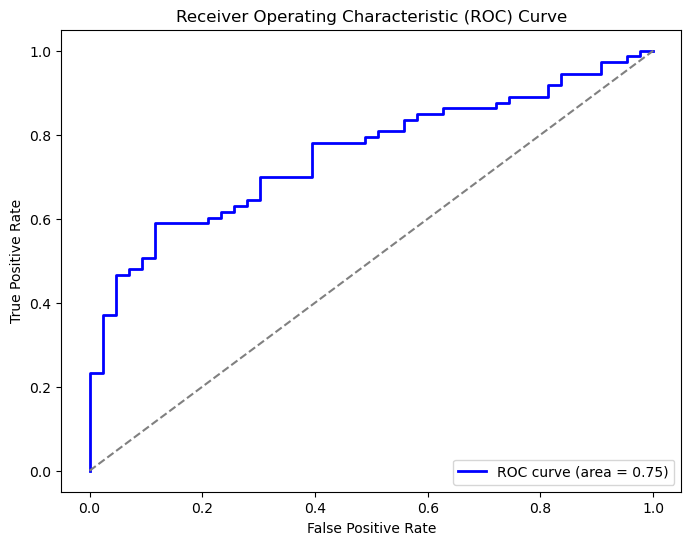

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Discriminatory Power**: The curve's position well above the random-chance diagonal (the dashed line) confirms that the model has a meaningful ability to distinguish between patients with and without liver disease.

**Area Under the Curve (AUC)**: The model achieves an AUC of 0.75. This score provides a single aggregate measure of its performance, indicating a fair-to-good ability to classify patients correctly. A score of 0.75 means there is a 75% chance that the model will rank a randomly chosen positive instance higher than a randomly chosen negative one.
##### While there is room for improvement, an AUC of 0.75 demonstrates that the logistic regression model is an effective and useful classifier for this dataset.